<a href="https://colab.research.google.com/github/lakshitgosain/Tensorflow-ZTM/blob/main/TF_ZTM_03_Comuter_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Convolutional Neural Network and Computer Vision with TensorFlow

## Get the Data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-05-03 05:05:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 142.251.111.128, 142.251.167.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   175MB/s    in 0.6s    

2023-05-03 05:05:07 (175 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
#Unzip the Downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")

In [3]:
zip_ref.extractall()
zip_ref.close()

In [5]:
!ls pizza_steak

test  train


In [6]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:

# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [9]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


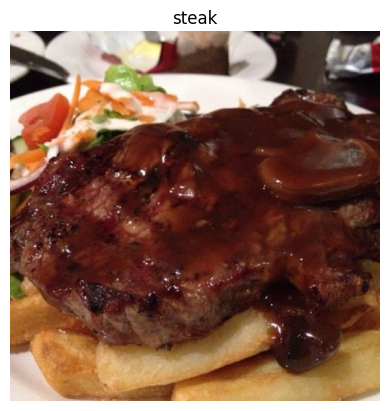

In [10]:


# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [11]:
# View the img (actually just a big array/tensor)
img

array([[[240, 233, 223],
        [238, 231, 221],
        [237, 229, 218],
        ...,
        [ 21,  12,  15],
        [ 20,  11,  14],
        [ 22,  13,  16]],

       [[241, 234, 224],
        [238, 231, 221],
        [236, 228, 217],
        ...,
        [ 25,  16,  19],
        [ 26,  17,  20],
        [ 30,  21,  24]],

       [[240, 236, 225],
        [240, 233, 223],
        [238, 230, 219],
        ...,
        [ 24,  13,  17],
        [ 27,  16,  20],
        [ 30,  19,  23]],

       ...,

       [[239, 226, 218],
        [237, 224, 216],
        [236, 223, 215],
        ...,
        [241, 229, 217],
        [240, 230, 220],
        [240, 230, 220]],

       [[240, 227, 219],
        [236, 223, 215],
        [235, 222, 214],
        ...,
        [239, 227, 215],
        [237, 227, 215],
        [238, 228, 218]],

       [[240, 227, 219],
        [236, 223, 215],
        [235, 222, 214],
        ...,
        [241, 229, 217],
        [239, 229, 217],
        [239, 229, 219]]

In [12]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.94117647, 0.91372549, 0.8745098 ],
        [0.93333333, 0.90588235, 0.86666667],
        [0.92941176, 0.89803922, 0.85490196],
        ...,
        [0.08235294, 0.04705882, 0.05882353],
        [0.07843137, 0.04313725, 0.05490196],
        [0.08627451, 0.05098039, 0.0627451 ]],

       [[0.94509804, 0.91764706, 0.87843137],
        [0.93333333, 0.90588235, 0.86666667],
        [0.9254902 , 0.89411765, 0.85098039],
        ...,
        [0.09803922, 0.0627451 , 0.0745098 ],
        [0.10196078, 0.06666667, 0.07843137],
        [0.11764706, 0.08235294, 0.09411765]],

       [[0.94117647, 0.9254902 , 0.88235294],
        [0.94117647, 0.91372549, 0.8745098 ],
        [0.93333333, 0.90196078, 0.85882353],
        ...,
        [0.09411765, 0.05098039, 0.06666667],
        [0.10588235, 0.0627451 , 0.07843137],
        [0.11764706, 0.0745098 , 0.09019608]],

       ...,

       [[0.9372549 , 0.88627451, 0.85490196],
        [0.92941176, 0.87843137, 0.84705882],
        [0.9254902 , 0